### Polynomial Regression

In [1]:
# Polynomial Regression is a non linear regression model
# y = b0 + b1x1 + b2x1^2 + b3x1^3 + .......+ bnx1^n
# Its quite similar to mutiple  lin reg instead of having different independent variables like x1,x2,...xn here in polynomial 
# lin reg we have only one variable(ex: x1) with different power

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\Machine Learning A-Z\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)'

In [55]:
os.chdir('C:\\Users\\HP\\Desktop\\Machine Learning A-Z\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)')

In [56]:
data= pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [57]:
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [58]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# from sklearn.preprocessing import StandardScalar
# sc_X = StandardScalar()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

#as dataset is too small we don't go for splitting
#no need to apply feature scaling because we r going to use the same library as we use for linear regression,which is a library
#that does the feature scaling to make more accurate predictions.

In [59]:
# lets first bulid the linear regression model for the data and comapre results with the polynomial regresion model result.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
# Now build polynomial regresssion model

# So to create this model we r going to import a new class which is a simply a class which is going to give the tools to include
# some polynomial terms into the linear regression equation and this class is actually called as polynomial features.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly

#looking at the original varaible 'X' matrix(position levels of employees in the company)and
#here in new 'X_poly' matrix we have 3 columns ,notice that the position levels comes here  of 'X' is actually the column
#in the middle that corresponds to X1 the independen variable.
#the 2nd column in X_poly is square of the 1st column that is actually the polynomial term
#1st column(index postion 0 or say X0) is nothing but when we done multiple linear regression model implementing backward
#elemination had to add a column of ones to include constant b0 in our multp lin reg eqn 
# here in 'X_poly' its exactly the same, 'poly_reg' tool object that we created automatimatically creates the column of ones to
# include the b0 

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [81]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [82]:
# One thing left to do is to include this fit into multiple linear regression  model
# and to do this we r going to create a new linear regression object
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

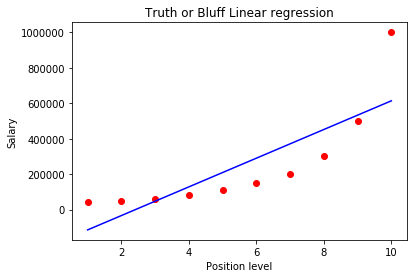

In [83]:
# Visuaizing the Linear Regression results

# lin.reg.predict(X) is the predicted salaries of the 10 position levels predicted by our linear regression model
plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg.predict(X),color = 'blue')
plt.title('Truth or Bluff Linear regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# first of all lets make distinction between the observation points(red points) and the predictions which are the points on the 
# straight line(blue).
# these are not great predictions except two points(something like 3,9.2) where the red points are really close to straight line
# as u can seee its difficult to make a straight line that'll b close to all red points, and that's y v need to level up nd make
# a non linear model that'll therefore not be a straight line and that'll make much better predictions(i.e much better predictd
# salaries that'll help us in our negotiation)

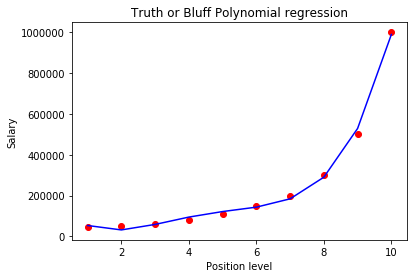

In [84]:
#visualizing the polynomial Regression results

### here we imagines that we simply need to replace this "lin_reg by lin_reg2" which is the object we created for our polynomail
# regression but u can notice that this lin_reg2 object is actually not enough object of certain polynomial regression class,
# it's still an object from LinearRegression() class
# so we need to add something in plt.plot(X,......,color='blue') to get the predictions of our polynomial regression model
# So basically we transformed our matrix of features X into matrix of features of X_poly containing the position levels
# and v actually need to include that information here in plt.plot(X,......,color='blue')

#  Since X_poly was already defined as the transformation of our matrix of features,well if we want to add some new observations
#  and to plot some polynomial regression result we would rather take fully fit (poly_reg.fit_transform(X)) in plt.plot() that
# transforms any matrix of features u want instead of X_poly in plt.plot(X,......,color='blue')

plt.scatter(X,y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Truth or Bluff Polynomial regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [79]:
# A linear model in two dimension will give u a straight line
# And a non linear model will give u anything(like curves, parabolic curves) except straight line

# By changing the degrees in PolynomialFeatures(degree = 2 or 3 or 4) the prediction rate also improves

#from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree=3)
#X_poly = poly_reg.fit_transform(X)
#X_poly

# run the below code after changing the degree values and observe the difference with  previous plot
#plt.scatter(X,y,color = 'red')
#plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color = 'blue')
#plt.title('Truth or Bluff Polynomial regression')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

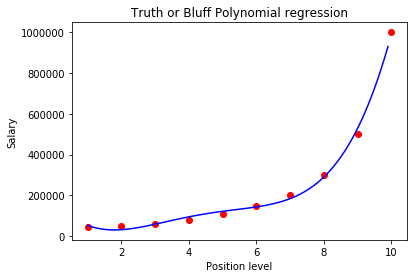

In [87]:
# we can improve the plot in polynomial regression output with some advance technique
# indeed what's happening here is that our code is giving us the predictions of the model for each of the 10  levels from 1-10
# but it's plotting some straight lines in between two predictions.
# v can actually have the real continuous curve by instead of having only the predictions from the 1 to 10 incremented 1, v can
# have the predictions from 1 to 10 incremented by a higher resolution like a 0.1 

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color = 'red')
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color = 'blue')
plt.title('Truth or Bluff Polynomial regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [88]:
# Final step is to say truth or bluff by predicting the previous salary of this new employee(assume that he says us that his 
# previous salary was 160 K) and so we'll comapre this value to oor prediction to conclude


# predicting the new result by Linear Regression model
lin_reg.predict(6.5)           # level = 6.5, will return the predicted salary corresponding to this 6.5

array([330378.78787879])

In [89]:
#  predicting the new result by Polynomial Regression model
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])

In [ ]:
# So this future employee said his previous salary was 160K the linear regression model predicted that his previous salary was
# 330K where polynomial regression predicted that it was 158K which is more accuarte
# therefore actually the verdict is truth and honest